                                                                                                       Mohit Chaudhary


# Getting you feet wet in Deep Learning the express way

Today we'll be doing our first hands-on with Deep Learning using an actual neural network.
Our objectives for today:

1. Exploring jupyter notebook
2. Data splitting and setting up data source
3. Experience end to end workflow in DL
4. Why use a pretrained NN instead of training from scratch

### 1. Exploring jupyter notebook

learn more on wiki : https://jupyter-notebook.readthedocs.io/en/stable/


### We are following a top-down approach 


### 2. Data Splitting

We usually split our data into 2 categories 
1. train
2. test

but often we see a third type

3. validate

![title](dir-str.png)




In ML era its used to be 3:2:2 ratio split

In NN era (dataset >= ~100k records) 98:1:1 is usually taken


### 3. Experience end to end workflow in DL


#### Boring stuff starts 


In [1]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import utils; reload(utils)
from utils import plots

Using cuDNN version 7003 on context None
Mapped name None to device cuda0: GeForce GT 740M (0000:07:00.0)
Using Theano backend.


In [4]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

#### Good stuff starts

#### Few things to take care of

1. Add dataset in current directory
2. put model in ~/.keras/models (create models folder in ~/.keras if not present)

#### Lets start

In [5]:
path = "dogscats/sample/"

In [6]:
# As large as you can, but no larger than 64 is recommended. 
# If you have an older or cheaper GPU, you'll run out of memory, so will have to decrease this.
# Same limits apply to CPU as well
batch_size=4

In [7]:
vgg = Vgg16()

In [8]:
print("Currently we have "+str(len(vgg.classes)) + " classes")
vgg.classes[:4]

Currently we have 1000 classes


[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']

In [9]:
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)


Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [10]:
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 4s - loss: 1.0494 - acc: 0.7500 - val_loss: 0.9058 - val_acc: 0.6250


In [11]:
print("After fine tuning we have "+str(len(vgg.classes)) + " classes")
vgg.classes[:]

After fine tuning we have 2 classes


['cats', 'dogs']

In [11]:
imgs,labels = next(batches)

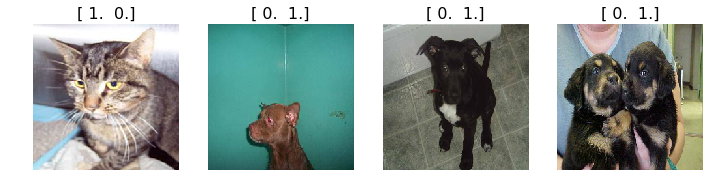

In [12]:
plots(imgs, titles=labels)

In [13]:
vgg.predict(imgs, True)

(array([ 0.9628,  0.5617,  0.8354,  0.7913], dtype=float32),
 array([0, 1, 0, 1]),
 ['cats', 'dogs', 'cats', 'dogs'])

###  Lets summarize

1 class encapsulating all the functionality
Using a pretrained model

## Lets discuss the VGG model now

#### 4. Why use a pretrained NN instead of training from scratch

*Vgg16*, a model that has been fully created for us, can recognise a wide variety (1,000 categories) of images. We will use 'VGG', which won the 2014 Imagenet competition, and is a very simple model to create and understand. The VGG Imagenet team created both a larger, slower, slightly more accurate model (*VGG  19*) and a smaller, faster model (*VGG 16*). We will be using VGG 16 since the much slower performance of VGG19 is generally not worth the very minor improvement in accuracy.

We have created a python class, *Vgg16*, which makes using the VGG 16 model very straightforward. 

![title](vgg16.png)


In [15]:
vgg = Vgg16()

In [16]:
path = "dogscats/"

In [17]:
batches = vgg.get_batches(path+'train', batch_size=4)

Found 23000 images belonging to 2 classes.


In [18]:
imgs,labels = next(batches)

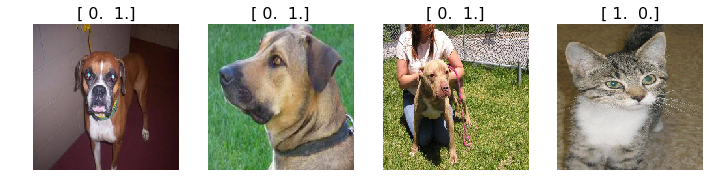

In [19]:
plots(imgs, titles=labels)

In [20]:
vgg.predict(imgs, True)

(array([ 0.9953,  0.268 ,  0.3657,  0.5678], dtype=float32),
 array([242, 159, 178, 281]),
 [u'boxer', u'Rhodesian_ridgeback', u'Weimaraner', u'tabby'])

## Going indept of our code 

In [21]:
vgg = Vgg16()

In [30]:
path = "dogscats/sample/"

In [31]:
batch_size=4

In [32]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 16 images belonging to 2 classes.
Found 8 images belonging to 2 classes.


In [33]:
vgg.finetune(batches)

![title](finetune.png)

In [34]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 4s - loss: 0.7967 - acc: 0.6250 - val_loss: 0.3157 - val_acc: 0.7500


In [ ]:
imgs,labels = next(batches)

In [ ]:
plots(imgs, titles=labels)

In [ ]:
vgg.predict(imgs, True)

                                                                                                       Mohit Chaudhary